In [1]:
pip install librosa numpy pandas matplotlib scikit-learn tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
DATA_PATH = r"C:\Users\pooja\AI_ML\Deep learning\Projects\Project 2_audio\genres\genres"

In [3]:
import librosa
import numpy as np
from typing import List, Union, Tuple


def extract_features(file_path: str, n_mfcc: int = 40) -> np.ndarray:
    """
    Extract Mel-frequency cepstral coefficients (MFCCs) from an audio file.
    
    Args:
        file_path (str): Path to the audio file.
        n_mfcc (int, optional): Number of MFCCs to extract. Defaults to 40.
        
    Returns:
        np.ndarray: Mean of transposed MFCCs, representing the audio features.
    """
    # Load the audio file with a fixed duration
    y, sr = librosa.load(file_path, duration=30)
    
    # Extract MFCCs from the audio signal
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    
    # Calculate the mean of the transposed MFCCs to get a fixed-length feature vector
    mfccs_scaled = np.mean(mfccs.T, axis=0)
    
    return mfccs_scaled

In [4]:
import os

def load_data(data_path=DATA_PATH):
    features = []
    labels = []
    genres = os.listdir(data_path)

    for genre in genres:
        genre_path = os.path.join(data_path, genre)
        for file in os.listdir(genre_path):
            if file.endswith('.au'):
                file_path = os.path.join(genre_path, file)
                features.append(extract_features(file_path))
                labels.append(genre)

    return np.array(features), np.array(labels)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
X, y = load_data()
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42)



C:\ProgramData\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Assume you already loaded X_train, X_val, y_train, y_val
num_labels = len(np.unique(y_train))
input_shape = X_train.shape[1]

# Build the model
model = Sequential([
    Dense(256, input_shape=(input_shape,), activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(num_labels, activation='softmax')
])

# Compile
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Early stopping to prevent overfitting
#early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    #callbacks=[early_stop],
    verbose=1
)


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 78ms/step - accuracy: 0.1988 - loss: 2.5999 - val_accuracy: 0.1600 - val_loss: 3.9821
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.3555 - loss: 1.8820 - val_accuracy: 0.2450 - val_loss: 2.5078
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3734 - loss: 1.7955 - val_accuracy: 0.2950 - val_loss: 2.0969
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4040 - loss: 1.6868 - val_accuracy: 0.3650 - val_loss: 1.7443
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4330 - loss: 1.6337 - val_accuracy: 0.4350 - val_loss: 1.6390
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4585 - loss: 1.5156 - val_accuracy: 0.4400 - val_loss: 1.5061
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4474 - loss: 1.4968 - val_accuracy: 0.5000 - val_loss: 1.4056
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5227 - loss: 1.3434 - val_accuracy: 0

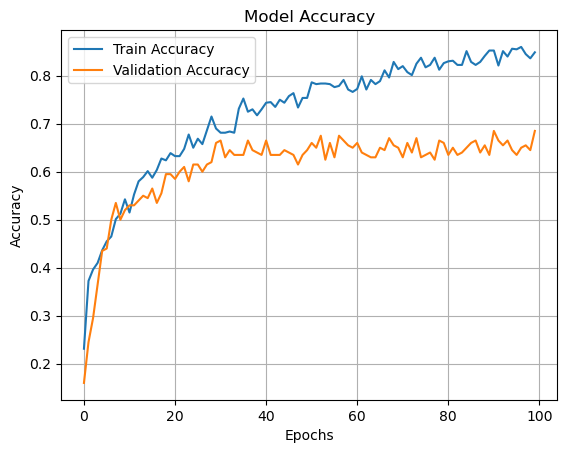

In [65]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()



In [67]:
loss, acc = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {acc * 100:.2f}%")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6946 - loss: 1.3846  
Validation Accuracy: 68.50%
